# 8. Advanced Examples

In the last section we look at some advanced examples. 
Here, the idea is that you see how a full script might 
look like and to get insights what kind of analysis
tools / libraries are available.

In the follwing we will have a look at two examples, which use the
libraries 
* ```scipy```: [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html) 
contains modules for scientific computation and builds upon NumPy.
* ```sklearn```: The [scikit-learn library](https://scikit-learn.org/) 
offers a lot efficient implementations for Machine Learning. 

Some other interesting libraries you might want to check out:

* ```rpy2``` for using R in Python: [porting code from R to Python](https://rpy2.readthedocs.io/en/latest/porting-to-rpy2.html)
* ```wx``` for programming Graphical User Interfaces: 
[wxPython overview](https://www.wxpython.org/pages/overview/)
* ```arcpy``` is a geoprocessing tool for combining Python with ArcGIS:
[ArcPy quick tour](https://desktop.arcgis.com/en/arcmap/10.3/analyze/arcpy/a-quick-tour-of-arcpy.htm)
* ```sqlite3``` for creating and working with SQLite databases: 
See an example of how to [create a table](https://www.sqlitetutorial.net/sqlite-python/create-tables/)
* ```pysam``` for reading and manipulating biological sequence data: 
[working with BAM and SAM formatted files](https://pysam.readthedocs.io/en/latest/api.html)

***
# Hypothesis Testing

Statistical hypothesis testing plays a crucial role in various disciplines. 
Python and in particular SciPy offers a great variety of already implemented
statistical tools. Let's have a look how you can perform a __one sample t-test__.

In [1]:
from scipy.stats import ttest_1samp

In [2]:
import numpy as np
import matplotlib.pyplot as plt

First, we create some exemplary data and sample __uniformly__ 
300 random age values from 0 to 80.

In [3]:
age = np.random.randint(low=0, high=80, size=300)

Or, we could sample from a __normal distribution__ with 
$\mu=35$ (loc) and $\sigma=10$ (sacle) 
300 random age values.

In [7]:
age = np.random.normal(loc=35.0, scale=10.0, size=300)

We inspect the data with an histrogram where the age values are aggregated in 20 bins.

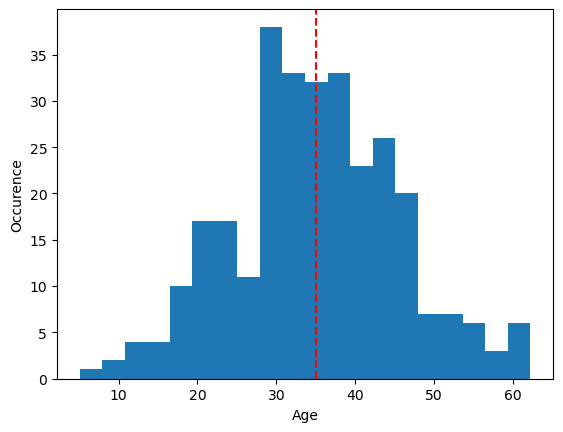

In [9]:
plt.hist(age, bins=20)
plt.xlabel('Age')
plt.ylabel('Occurence')
plt.axvline(x=35, color='red', linestyle='--')
plt.show()

Let us assume that our __null hypothesis__ is that the mean
population age is 35, represented by the dashed red line
in the plot. The age mean of our data is

In [10]:
# age_mean = np.mean(age)

age_mean = age.mean()

print('Data age mean:', age_mean, '\n')

Data age mean: 35.066294167125044 



We now test the null hypothesis with a one-sample t-test.

In [11]:
tstat, pval = ttest_1samp(age, popmean=35)

print("p-value:", pval, '\n')

if pval < 0.05:    
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value: 0.913618977977394 

We accept the null hypothesis


***
# Classification with Random Forests

In the next example, we will try to classify premium red wine from their 
measured properties (features). Random Forests are very powerful machine
learning methods which build on decision trees. A decision tree in our 
application would look something like this:

<center><img src="images/example_tree.png" alt="Persons Example" width="400"/></center>

Random Forests construct a multitude of such decision trees. The individual 
decision trees provide a classification result and by majority voting 
the final classification is obtained.

If you want to see a good example of what a "real" class might 
look like check out the [base class for random forests](https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/ensemble/_forest.py#L172).

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

This is what we had before:

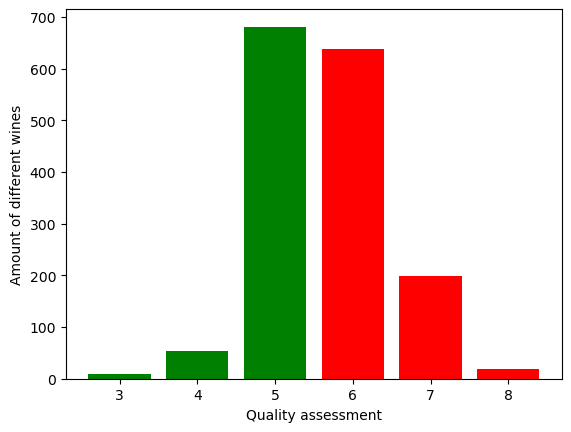

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,premium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

wine_data['premium'] = wine_data['quality'] > 5
#wine_data['premium'] = wine_data['quality'] > 6

quality_counts = wine_data['quality'].value_counts()

colours = ['green','red','red','green','red','green'] # for > 5
#colours = ['green','green','red','green','red','green'] # for > 6

plt.bar(quality_counts.index, quality_counts, color=colours)
plt.xlabel('Quality assessment')
plt.ylabel('Amount of different wines')
plt.show()

wine_data.head(5)

This is new:

In [21]:
target = wine_data['premium'].astype(int)
wine_features = wine_data.drop(['quality','premium'], axis=1)

print("Shape of wine_features:\t{}\nShape of target:\t{}\n"
      .format(wine_features.shape, target.shape)
     )

Shape of wine_features:	(1599, 11)
Shape of target:	(1599,)



In [22]:
target.head(5)

0    0
1    0
2    0
3    1
4    0
Name: premium, dtype: int64

#### The __Goal__
is to learn a classifier which predicts whether a wine is a premium /
non-premium wine on the basis of the measured wine features.

Select (randomly) a set on which the Random Forest classifier is 
calibrated / trained on and a test set on which the performance
is assessed. We consider a test set size of 30% of the original data
set.

In [23]:
feat_train, feat_test, target_train, target_test = train_test_split(
    wine_features, target, test_size = 0.3)

print("After splitting into train and test sets:\n\n"
      "Shape of feat_train:\t{}\nShape of target_train:\t{}\n"
      "Shape of feat_test:\t{}\nShape of target_test:\t{}"
      .format(feat_train.shape, target_train.shape, feat_test.shape, 
              target_test.shape)
     )

After splitting into train and test sets:

Shape of feat_train:	(1119, 11)
Shape of target_train:	(1119,)
Shape of feat_test:	(480, 11)
Shape of target_test:	(480,)


In [24]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=8)
random_forest.fit(feat_train, target_train)

RandomForestClassifier(max_depth=8)

In [25]:
correct_pred = random_forest.predict(feat_test) == target_test

correct = correct_pred.value_counts()

accuracy = (correct[True] / (correct[True] + correct[False]))*100
print("The random forest identified premium / non-premium wines with {}% accuracy!"
      .format(accuracy))

The random forest identified premium / non-premium wines with 81.04166666666667% accuracy!


Let's check what is actually predicted wrongly:

In [26]:
rel_incorrect_pred = target_test[correct_pred == False].value_counts() / target_test.value_counts()

print("Incorrect predictions by premium quality:\n{}".format(rel_incorrect_pred))
print("\nRatio of premium / non-premium wines in test set:\n{}"
      .format(target_test.value_counts(normalize=True))
     )      

Incorrect predictions by premium quality:
premium
1    0.193676
0    0.185022
Name: count, dtype: float64

Ratio of premium / non-premium wines in test set:
premium
1    0.527083
0    0.472917
Name: proportion, dtype: float64


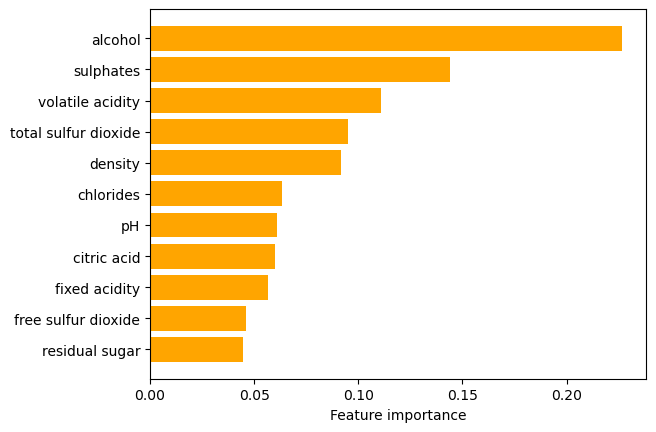

In [27]:
feature_scores = random_forest.feature_importances_
feature_names = list(wine_features.columns)

important_features = pd.Series(feature_scores, index=feature_names).sort_values()

plt.barh(important_features.index, important_features, color='Orange')
plt.xlabel('Feature importance')
plt.show()